In [3]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [12]:
# options
dataset = 'cifar10' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01     # learning rate

In [13]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet

#set train_set shuffle= False for 50 example question

if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


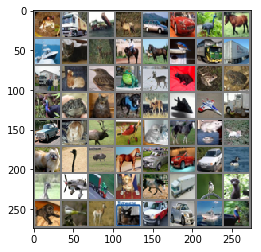

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))


In [8]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [9]:
## network and optimizer including hidden layer
if dataset == 'mnist':
    num_inputs = 784
    num_hidden = 1000
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Nets(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Nets, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(num_inputs, num_hidden),
            nn.Tanh(),
            nn.Linear(num_hidden, num_outputs),
            nn.Tanh()
        )

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.model(input)
        return output

network2 = Nets(num_inputs, num_outputs)
optimizer = optim.SGD(network2.parameters(), lr=lr)

In [10]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx %100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data), Variable(target)
        with torch.no_grad():
            output = network(data)
            test_loss += F.cross_entropy(output, target, reduction="sum").data.item() # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))




In [60]:
#train_test with model including hidden layer
def train(epoch):
    network2.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network2(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network2.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data), Variable(target)
        with torch.no_grad():
            output = network2(data)
            test_loss += F.cross_entropy(output, target, reduction="sum").data.item() # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))




In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
for epoch in range(1, epochs + 1):
    train(epoch)
    test()
#change network name as needed when plotting
fig=plt.figure()
for i in range(0,10):
    ax1 = fig.add_subplot(4,3,i+1)
    ax1.imshow(network.linear.weight.data.numpy()[i].reshape([5,5]),cmap=plt.cm.binary)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.255963
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.168545
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.463217
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.151602
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.490204
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.407881
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.304214
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.414097
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.276569
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.392275

Test set: Average loss: 2.3338, Accuracy: 1634/10000 (16%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.255963
Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.168545
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.463217
Train Epoch: 2 [19200/60000 (32%)]	Loss: 2.151602
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.490204
Train Epoch: 2 [32000/60000 (53%)]	Loss: 2.407881
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.304214
Train Epoch: 2 [44800/60000 (75%)]	Loss: 2.414097
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.276569
T

KeyboardInterrupt: 

In [7]:
#CNN network and optimizer

epochs_c=20
lr_c=0.01



if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10

class CNN_Net(nn.Module):
    def __init__(self):
        super(CNN_Net, self).__init__()
        self.conv1=nn.Conv2d(3,16,kernel_size=5)
        self.conv2=nn.Conv2d(16,128,kernel_size=5)
        self.fc1 = nn.Linear(128 * 5 * 5, 64)
        self.fc2 = nn.Linear(64, 10)


    def forward(self, x):
        x = F.max_pool2d(torch.tanh(self.conv1(x)), (2, 2))
        x = F.max_pool2d(torch.tanh(self.conv2(x)), (2, 2))
        x = x.view(-1, self.num_flat_features(x))
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

network_CNN = CNN_Net()
print(network_CNN)
optimizer = optim.SGD(network_CNN.parameters(), lr=lr_c)

CNN_Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=3200, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
def train_CNN(epoch):
    network_CNN.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network_CNN(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test_CNN():
    network_CNN.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data), Variable(target)
        with torch.no_grad():
            output = network_CNN(data)
            test_loss += F.cross_entropy(output, target, reduction="sum").data.item() # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [9]:
for epoch in range(1, epochs_c + 1):
    train_CNN(epoch)
    test_CNN()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.298880
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.165870
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.036782
Train Epoch: 1 [19200/50000 (38%)]	Loss: 2.023883
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.003274
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.930639
Train Epoch: 1 [38400/50000 (77%)]	Loss: 2.011447
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.748299

Test set: Average loss: 1.7757, Accuracy: 3781/10000 (37%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.839171
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.693297
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.533852
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.669518
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.707779
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.629963
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.759724
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.529496

Test set: Average loss: 1.5774, Accuracy: 4375/10000 (43%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.589650
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.519


Test set: Average loss: 0.9390, Accuracy: 6698/10000 (66%)

Train Epoch: 19 [0/50000 (0%)]	Loss: 0.840357
Train Epoch: 19 [6400/50000 (13%)]	Loss: 0.758153
Train Epoch: 19 [12800/50000 (26%)]	Loss: 0.694850
Train Epoch: 19 [19200/50000 (38%)]	Loss: 0.831756
Train Epoch: 19 [25600/50000 (51%)]	Loss: 0.756537
Train Epoch: 19 [32000/50000 (64%)]	Loss: 0.890631
Train Epoch: 19 [38400/50000 (77%)]	Loss: 0.834639
Train Epoch: 19 [44800/50000 (90%)]	Loss: 0.851517

Test set: Average loss: 0.9294, Accuracy: 6743/10000 (67%)

Train Epoch: 20 [0/50000 (0%)]	Loss: 0.817731
Train Epoch: 20 [6400/50000 (13%)]	Loss: 0.734332
Train Epoch: 20 [12800/50000 (26%)]	Loss: 0.677254
Train Epoch: 20 [19200/50000 (38%)]	Loss: 0.805924
Train Epoch: 20 [25600/50000 (51%)]	Loss: 0.738089
Train Epoch: 20 [32000/50000 (64%)]	Loss: 0.865306
Train Epoch: 20 [38400/50000 (77%)]	Loss: 0.814538
Train Epoch: 20 [44800/50000 (90%)]	Loss: 0.836976

Test set: Average loss: 0.9213, Accuracy: 6781/10000 (67%)



In [66]:
import visdom

visdom.Visdom().images(network_CNN.conv1.weight.data)

'window_36aa4a61b1d0d2'